C:\Users\Pedro Mendoza\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


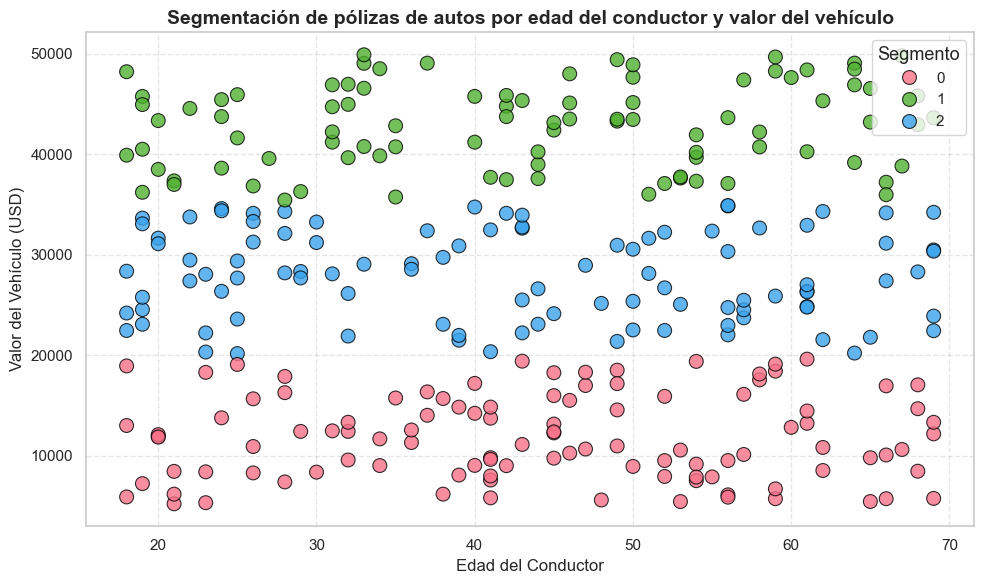

Archivo exportado como: datos_segmentacion_actuarial.csv


<Figure size 640x480 with 0 Axes>

In [2]:
# =======================
# Segmentación Actuarial
# =======================

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración general
np.random.seed(42)
sns.set(style="whitegrid")

# 1. Simular datos actuariales
n_samples = 300
data = pd.DataFrame({
    'edad_conductor': np.random.randint(18, 70, size=n_samples),
    'valor_vehiculo_usd': np.random.randint(5000, 50000, size=n_samples),
    'historial_siniestros': np.random.poisson(1.2, size=n_samples),
    'prima_anual_usd': np.random.randint(300, 2000, size=n_samples)
})

# 2. Aplicar KMeans para segmentar
kmeans = KMeans(n_clusters=3, random_state=42)
data['segmento'] = kmeans.fit_predict(data[['edad_conductor', 'valor_vehiculo_usd', 'historial_siniestros']])

# 3. Visualizar los resultados
plt.figure(figsize=(10, 6))
palette = sns.color_palette("husl", 3)
sns.scatterplot(
    data=data,
    x='edad_conductor',
    y='valor_vehiculo_usd',
    hue='segmento',
    palette=palette,
    s=100,
    edgecolor='black',
    alpha=0.8
)
plt.title('Segmentación de pólizas de autos por edad del conductor y valor del vehículo', fontsize=14, weight='bold')
plt.xlabel('Edad del Conductor', fontsize=12)
plt.ylabel('Valor del Vehículo (USD)', fontsize=12)
plt.legend(title='Segmento', title_fontsize='13', fontsize='11')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 4. Guardar CSV para subir a GitHub
data.to_csv('datos_segmentacion_actuarial.csv', index=False)
print("Archivo exportado como: datos_segmentacion_actuarial.csv")

plt.savefig("grafico_segmentacion_actuarial.png", dpi=300)
